In [2]:
#Importando as bibliotecas responsáveis por:
#Análise e manipulação dos dados
import pandas as pd
#Operações matemáticas
import numpy as np
#Visualização e plotagem de gráficos
import matplotlib.pyplot as plt
import seaborn as sns


#Criando o dataframe
df = pd.read_csv('estagio_compartilhado.csv')
#Visualizando o dataframe através da função 'head'
df.head()

,Curso,Empresa,Data Início,Data Término
0,Engenharia Química,3GEN CONSULTORIA EMPRESARIAL LTDA,2018-03-23 00:00:00,2018-12-19 00:00:00
1,Engenharia de Materiais,3GEN CONSULTORIA EMPRESARIAL LTDA,2017-07-20 00:00:00,2017-12-31 00:00:00
2,Engenharia Química,3M DO BRASIL LTDA,2018-01-15 00:00:00,2018-12-31 00:00:00
3,Engenharia Química,3M DO BRASIL LTDA,2018-02-15 00:00:00,2019-02-14 00:00:00
4,Engenharia Química,3M DO BRASIL LTDA,2017-07-24 00:00:00,2018-07-23 00:00:00


In [4]:
#Utilizando a função dropna para remover linhas que possuem qual valor vazio em uma de suas colunas.
df.dropna(axis=0,how='any')
df.rename(columns={'Curso ': 'Curso'}, inplace = True)

In [10]:
listaempresas = df['Empresa'].value_counts()
print(listaempresas)

BASF S/A                                        414
ESCOLA DE ENGENHARIA DE LORENA                  206
CONFAB INDUSTRIAL S/A                           136
JOHNSON & JOHNSON INDUSTRIAL LTDA.              129
CRUZEIRO PAPEIS INDUSTRIAIS - CPI               129
                                               ... 
NUFARM INDUSTRIA QUIMICA E FARMACEUTICA S.A.      1
CCL LABEL DO BRASIL S/A                           1
100 TECNOLOGIA LTDA                               1
SPERSS CAPITAL PARTNERS LTDA.                     1
JUNTOS SOMOS MAIS FIDELIZAÇÃO S.A                 1
Name: Empresa, Length: 602, dtype: int64


In [24]:
#Identificando os valores presentes na coluna Curso do no DataFrame criado

In [1]:
'''
Após todo processo de filtragem, agora vamos começar a interpretar nossos dados.

Primeira proposta:
- Identificar qual a porcentagem de alunos da EEL que estão estagiando em 2022. 
Para isso, será necessário primeiramente transformar nossa coluna data de início para o tipo 'datetime' [3]. Assim será
possível determinar a primera data do ano [4] e selecionar somente os alunos que começaram seu estágio em 2022 [5] através
da função 'loc' [5]
'''

#Transformando a data em datetime [3]
df['Data Início'] = pd.to_datetime(df['Data Início'])
df['Data Término'] = pd.to_datetime(df['Data Término'])

#Selecionando a primeira data do ano [4]
datainicio = '2022-01-01'
datatermino = '2022-12-31'

estagiarios = len(df.loc[(df['Data Início'] > datainicio) & (df['Data Início'] < datatermino)])
total_alunos = 1925

porcentagem_estagiarios = (estagiarios/total_alunos)*100
print(f'Em 2022 a EEL possui {estagiarios} estagiários.')
print(f'Em 2022 a EEL possui {total_alunos} alunos.')
print(f'{porcentagem_estagiarios} dos alunos da EEL estão estagiando em 2022.')

NameError: name 'pd' is not defined

C:\Users\55129\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Porcentagem (%) de alunos estágiarios em 2022')

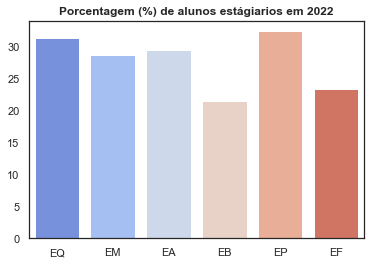

In [26]:
#Plotando o gráfico em relação aos valores acima
plt.figure()
curso = ['EQ','EM','EA','EB','EP','EF']
porcentagem = [31.3,28.7,29.4,21.5,32.4,23.3]
ax = sns.barplot(curso,porcentagem,palette = "coolwarm")
plt.title('Porcentagem (%) de alunos estágiarios em 2022',fontweight='bold')

In [27]:
df.head()

,Curso,Empresa,Data Início,Data Término
0,Engenharia Química,3GEN CONSULTORIA EMPRESARIAL LTDA,2018-03-23,2018-12-19
1,Engenharia de Materiais,3GEN CONSULTORIA EMPRESARIAL LTDA,2017-07-20,2017-12-31
2,Engenharia Química,3M DO BRASIL LTDA,2018-01-15,2018-12-31
3,Engenharia Química,3M DO BRASIL LTDA,2018-02-15,2019-02-14
4,Engenharia Química,3M DO BRASIL LTDA,2017-07-24,2018-07-23


In [28]:
df['Empresa'].value_counts().head(20)

BASF S/A                                                  414
ESCOLA DE ENGENHARIA DE LORENA                            206
CONFAB INDUSTRIAL S/A                                     136
CRUZEIRO PAPEIS INDUSTRIAIS - CPI                         129
JOHNSON & JOHNSON INDUSTRIAL LTDA.                        129
ITAÚ UNIBANCO S/A                                         122
A.C. NIELSEN DO BRASIL LTDA                               119
PROCTER & GAMBLE IND. E COM. LTDA                          89
AMSTED MAXION FUNDIÇÃO E EQUIPAMENTOS FERROVIÁRIOS S.A     80
PLASTIC OMNIUM DO BRASIL LTDA                              73
3M DO BRASIL LTDA                                          66
SUZANO PAPEL E CELULOSE S/A                                62
EMBRAER S/A                                                60
GERDAU S/A                                                 56
INTERVET DO BRASIL VETERINÁRIA LTDA                        51
MONSANTO DO BRASIL LTDA                                    46
BRASKEM 

In [29]:
df2 = df.loc[(df['Empresa'] == 'BASF S/A') | (df['Empresa'] == 'ESCOLA DE ENGENHARIA DE LORENA') |
             (df['Empresa'] == 'CONFAB INDUSTRIAL S/A') | (df['Empresa'] == 'CRUZEIRO PAPEIS INDUSTRIAIS - CPI') |
            (df['Empresa'] == 'JOHNSON & JOHNSON INDUSTRIAL LTDA.') | (df['Empresa'] == 'ESCOLA DE ENGENHARIA DE LORENA') |
            (df['Empresa'] == 'ITAÚ UNIBANCO S/A') | (df['Empresa'] == 'A.C. NIELSEN DO BRASIL LTDA') | 
            (df['Empresa'] == 'PROCTER & GAMBLE IND. E COM. LTDA') | (df['Empresa'] == 'AMSTED MAXION FUNDIÇÃO E EQUIPAMENTOS FERROVIÁRIOS S.A') |    
            (df['Empresa'] == 'PLASTIC OMNIUM DO BRASIL LTDA') | (df['Empresa'] == '3M DO BRASIL LTDA') | 
            (df['Empresa'] == '3M DO BRASIL LTDA') | (df['Empresa'] == 'SUZANO PAPEL E CELULOSE S/A') | 
            (df['Empresa'] == 'EMBRAER S/A') |  (df['Empresa'] == 'GERDAU S/A') | (df['Empresa'] == 'INTERVET DO BRASIL VETERINÁRIA LTDA') |
            (df['Empresa'] == 'MONSANTO DO BRASIL LTDA') | (df['Empresa'] == 'BRASKEM S/A') | (df['Empresa'] == 'EATON LTDA') | 
            (df['Empresa'] == 'AMBEV S.A.') | (df['Empresa'] == 'OXITENO S.A INDÚSTRIA E COMÉRCIO')]
df2

,Curso,Empresa,Data Início,Data Término
2,Engenharia Química,3M DO BRASIL LTDA,2018-01-15,2018-12-31
3,Engenharia Química,3M DO BRASIL LTDA,2018-02-15,2019-02-14
4,Engenharia Química,3M DO BRASIL LTDA,2017-07-24,2018-07-23
5,Engenharia Química,3M DO BRASIL LTDA,2018-07-23,2018-12-31
6,Engenharia Química,3M DO BRASIL LTDA,2021-02-08,2022-07-31
...,...,...,...,...
3552,Engenharia Química,SUZANO PAPEL E CELULOSE S/A,2021-02-11,2022-05-09
3553,Engenharia Química,SUZANO PAPEL E CELULOSE S/A,2021-02-18,2021-12-31
3554,Engenharia Química,SUZANO PAPEL E CELULOSE S/A,2022-01-01,2022-03-08
3555,Engenharia Química,SUZANO PAPEL E CELULOSE S/A,2020-03-11,2021-10-22


In [30]:
#Exportando arquivo
#nome_arquivo = 'estagio_teste.xlsx'
#df2.to_excel(nome_arquivo)
#print('DataFrame is written to Excel File successfully.')

In [31]:
df2 = df2.reset_index()
df2.head()

,index,Curso,Empresa,Data Início,Data Término
0,2,Engenharia Química,3M DO BRASIL LTDA,2018-01-15,2018-12-31
1,3,Engenharia Química,3M DO BRASIL LTDA,2018-02-15,2019-02-14
2,4,Engenharia Química,3M DO BRASIL LTDA,2017-07-24,2018-07-23
3,5,Engenharia Química,3M DO BRASIL LTDA,2018-07-23,2018-12-31
4,6,Engenharia Química,3M DO BRASIL LTDA,2021-02-08,2022-07-31


In [32]:
#Criando um dicionario que identifica as coordenadas de cada empresa
latitude = {'BASF S/A': -23.23251286378096, 'ESCOLA DE ENGENHARIA DE LORENA': -22.766931256674336,
           'CONFAB INDUSTRIAL S/A': -22.913712660748935, 'CRUZEIRO PAPEIS INDUSTRIAIS - CPI': -22.566157166725635, 
           'JOHNSON & JOHNSON INDUSTRIAL LTDA.':-23.237668660536038,'ITAÚ UNIBANCO S/A':-23.23007732593157,'A.C. NIELSEN DO BRASIL LTDA':-23.58305367143824, 'PROCTER & GAMBLE IND. E COM. LTDA':
           -23.643375171579706, 'AMSTED MAXION FUNDIÇÃO E EQUIPAMENTOS FERROVIÁRIOS S.A':-22.58657436920941, 
            'PLASTIC OMNIUM DO BRASIL LTDA':-23.00958905537824,'3M DO BRASIL LTDA': -22.769292748864455,'SUZANO PAPEL E CELULOSE S/A':
            -22.681910843482665,'EMBRAER S/A':-23.224600217629305, 'GERDAU S/A':-23.254010436033482,
            'INTERVET DO BRASIL VETERINÁRIA LTDA':-23.565107104530686, 'MONSANTO DO BRASIL LTDA':-23.6103244236921, 'BRASKEM S/A':
            -23.568611866483614, 'EATON LTDA':-23.505386250001827, 'AMBEV S.A.':-23.587384130832877, 'OXITENO S.A INDÚSTRIA E COMÉRCIO':
            -23.56068035141272}
longitude = {'BASF S/A':-45.980113050462336, 'ESCOLA DE ENGENHARIA DE LORENA': -45.102246147296384,
            'CONFAB INDUSTRIAL S/A': -45.35150343318769,'CRUZEIRO PAPEIS INDUSTRIAIS - CPI':-44.934566857389406,
            'JOHNSON & JOHNSON INDUSTRIAL LTDA.':-45.923370963094555,'ITAÚ UNIBANCO S/A':-45.919982169201546,
            'A.C. NIELSEN DO BRASIL LTDA':-46.8269345866771,'PROCTER & GAMBLE IND. E COM. LTDA': -46.73117278649875,
            'AMSTED MAXION FUNDIÇÃO E EQUIPAMENTOS FERROVIÁRIOS S.A ':-44.95755084909031,'PLASTIC OMNIUM DO BRASIL LTDA':
            -45.51509136078473,'3M DO BRASIL LTDA':-47.16721068576558,'SUZANO PAPEL E CELULOSE S/A': -48.88743658281136,
            'EMBRAER S/A':-45.855136020460336,'GERDAU S/A':-45.92271966534212,'INTERVET DO BRASIL VETERINÁRIA LTDA':
            -46.76406156218192,'MONSANTO DO BRASIL LTDA':-46.69688213193395,'BRASKEM S/A':-46.70323434988222,'EATON LTDA':
            -46.708666914291186,'AMBEV S.A.':-46.67234236168452,'OXITENO S.A INDÚSTRIA E COMÉRCIO':-46.64352887426492}

In [33]:
df2['Latitude'] = df2['Empresa'].map(latitude)
df2['Longitude'] = df2['Empresa'].map(longitude)
df2.tail()

,index,Curso,Empresa,Data Início,Data Término,Latitude,Longitude
1995,3552,Engenharia Química,SUZANO PAPEL E CELULOSE S/A,2021-02-11,2022-05-09,-22.681911,-48.887437
1996,3553,Engenharia Química,SUZANO PAPEL E CELULOSE S/A,2021-02-18,2021-12-31,-22.681911,-48.887437
1997,3554,Engenharia Química,SUZANO PAPEL E CELULOSE S/A,2022-01-01,2022-03-08,-22.681911,-48.887437
1998,3555,Engenharia Química,SUZANO PAPEL E CELULOSE S/A,2020-03-11,2021-10-22,-22.681911,-48.887437
1999,3556,Engenharia Ambiental,SUZANO PAPEL E CELULOSE S/A,2020-12-31,2021-12-30,-22.681911,-48.887437


In [34]:
'''
#Exportando arquivo
nome_arquivo = 'estagio_lat_lon.xlsx'
df2.to_excel(nome_arquivo)
print('DataFrame is written to Excel File successfully.')
'''

"\n#Exportando arquivo\nnome_arquivo = 'estagio_lat_lon.xlsx'\ndf2.to_excel(nome_arquivo)\nprint('DataFrame is written to Excel File successfully.')\n"

In [35]:
df['mes'] = df['Data Início'].dt.month
frequencia = df['mes'].value_counts().tolist()
dfmeses = df['mes'].value_counts()
print(frequencia)
print(dfmeses)
meses = ['Janeiro','Agosto','Fevereiro','Julho','Março','Abril','Outubro','Setembro','Junho','Maio','Novembro','Dezembro']

[766, 350, 312, 310, 306, 298, 288, 266, 242, 206, 206, 197]
1     766
8     350
2     312
7     310
3     306
4     298
10    288
9     266
6     242
5     206
11    206
12    197
Name: mes, dtype: int64


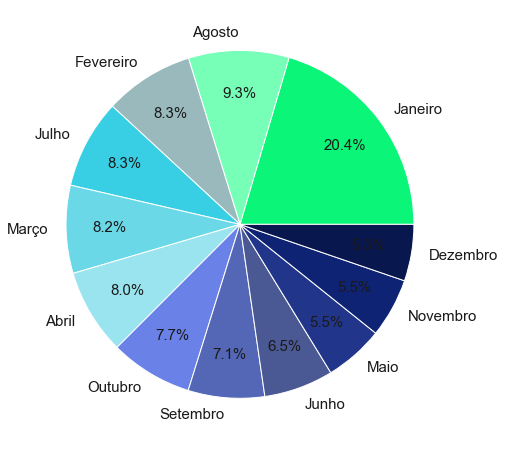

In [101]:
#Definindo o tamanho da imagem
plt.figure(figsize=(10,8))
#Definindo o tamanho da fonte das porcentagens e as cores
textprops = {"fontsize":15,'color':'k'}
cores = ['#09174F','#0F2374','#21368B','#4A5994','#5467B6','#6A82E7','#99E4EE','#6AD8E7','#38CFE4','#99B9BD','#77FFB7',
        '#0BF579']
cores = cores[::-1]
#Valores a serem plotado, legendas, raio das porcentagens, incluindo as porcentagens, modificando a fonte e tamanho
plt.pie(frequencia,labels=meses, pctdistance=0.75,autopct='%1.1f%%',textprops =textprops,colors=cores);
#Plotando o círculo central branco
#centre_circle = plt.Circle((0,0),0.50,fc='white',)
#fig = plt.gcf()
#fig.gca().add_artist(centre_circle)
#plt.title('Distribuição dos meses de recrutamento de estagiários EEL-USP',fontsize=15,fontweight='bold')

C:\Users\55129\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
No handles with labels found to put in legend.


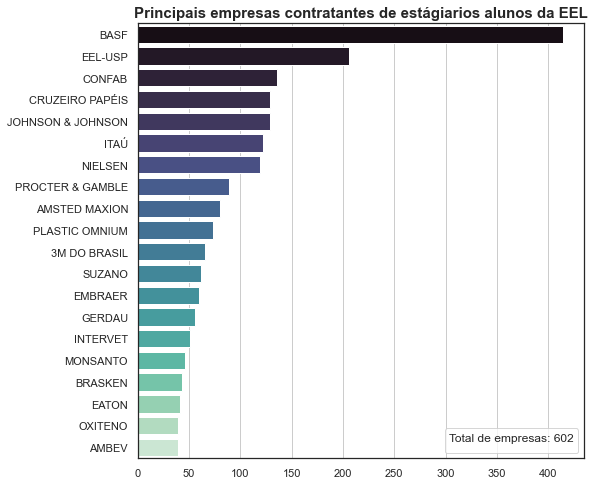

In [105]:
df.head()
freqempresas = df['Empresa'].value_counts().head(20).tolist()
df['Empresa'].value_counts().head(20)
empresas = ['BASF','EEL-USP','CONFAB','CRUZEIRO PAPÉIS','JOHNSON & JOHNSON','ITAÚ','NIELSEN','PROCTER & GAMBLE',
             'AMSTED MAXION','PLASTIC OMNIUM','3M DO BRASIL','SUZANO','EMBRAER','GERDAU','INTERVET','MONSANTO',
             'BRASKEN','EATON','OXITENO','AMBEV']

plt.figure(figsize=(8,8))
ax = sns.barplot(freqempresas,empresas,palette = "mako");
#plt.xticks(rotation=90);
plt.title('Principais empresas contratantes de estágiarios alunos da EEL',fontweight="bold",fontsize=15)
plt.legend(loc='lower right', title='Total de empresas: 602')
plt.grid(axis='x')
sns.set_theme(style="white")


In [64]:
#Analisando o número de estagiários de 2016 a 2022
df.head()
quimica = print(len(df.loc[(df['Curso'] == 'Engenharia Química')]))
ambiental = print(len(df.loc[(df['Curso'] == 'Engenharia Ambiental')]))
bioquimica = print(len(df.loc[(df['Curso'] == 'Engenharia Bioquimica')]))
fisica = print(len(df.loc[(df['Curso'] == 'Engenharia Física')]))
materiais = print(len(df.loc[(df['Curso'] == 'Engenharia de Materiais')]))
producao = print(len(df.loc[(df['Curso'] == 'Engenharia de Produção')]))

eixox = [quimica,ambiental,bioquimica,fisica,materiais,producao]
eixoy= np.arange(2016,2023,1)

2095
277
325
221
325
504
[2016 2017 2018 2019 2020 2021 2022]


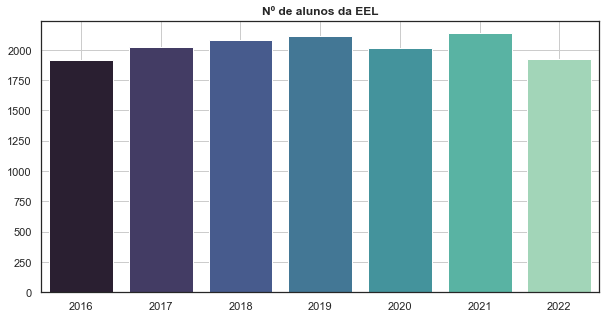

In [69]:
#Criando um gráfico com o nº de alunos de 2016-2022
plt.figure(figsize=(10,5))
nalunos = [1917,2027,2080,2111,2013,2135,1925]
ano = [2016,2017,2018,2019,2020,2021,2022]
sns.barplot(x=ano,y=nalunos,palette='mako');
plt.title('Nº de alunos da EEL',fontweight='bold');
plt.grid()